Importation of libraries

In [ ]:
import warnings
# Libraries for data manipulation:
import pandas as pd
import numpy as np

# Libraries for data visualization:
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for feature extraction: 
from scipy.stats import skew, kurtosis, entropy
from scipy.signal import find_peaks, periodogram
from scipy.signal import correlate
from scipy.integrate import simps
from scipy.fftpack import fft
from statsmodels.tsa.stattools import adfuller

# Machine Learning libraries:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

import xgboost as xgb
from scipy.stats import uniform, randint


Loading the datasets

In [30]:
signals=pd.read_csv('signals.csv')
signals_test=pd.read_csv('signals_test.csv')
signals_kaggle=pd.read_csv('signals_kaggle.csv')
metadata=pd.read_csv('metadata.csv')
metadata_test=pd.read_csv('metadata_test.csv')
metadata_kaggle=pd.read_csv('metadata_kaggle.csv')

Missing data inspection

In [31]:
signals.isna().sum()
signals_test.isna().sum()
signals_kaggle.isna().sum()
metadata.isna().sum()
metadata_test.isna().sum()
metadata_kaggle.isna().sum()

user_snippet                  0
x-axis__sum_values            0
x-axis__median                0
x-axis__mean                  0
x-axis__length                0
x-axis__standard_deviation    0
x-axis__variance              0
x-axis__root_mean_square      0
x-axis__maximum               0
x-axis__absolute_maximum      0
x-axis__minimum               0
y-axis__sum_values            0
y-axis__median                0
y-axis__mean                  0
y-axis__length                0
y-axis__standard_deviation    0
y-axis__variance              0
y-axis__root_mean_square      0
y-axis__maximum               0
y-axis__absolute_maximum      0
y-axis__minimum               0
z-axis__sum_values            0
z-axis__median                0
z-axis__mean                  0
z-axis__length                0
z-axis__standard_deviation    0
z-axis__variance              0
z-axis__root_mean_square      0
z-axis__maximum               0
z-axis__absolute_maximum      0
z-axis__minimum               0
dtype: i

Datasets structural overview

In [32]:
#Signals files
signals.head()
signals_test.head()
signals_kaggle.head()
#Metadata files
metadata.head()
metadata_test.head()
metadata_kaggle.head()

,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,...,z-axis__sum_values,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum
0,8054_0,880.46,8.560,8.8046,100.0,5.146708,26.488599,10.198509,19.53,19.53,...,-6.605867,-0.762740,-0.066059,100.0,3.058799,9.356253,3.059513,9.615966,9.615966,-9.152874
1,8054_1,552.88,5.520,5.5288,100.0,0.039173,0.001535,5.528939,5.63,5.63,...,823.670000,8.240000,8.236700,100.0,0.037445,0.001402,8.236785,8.310000,8.310000,8.120000
2,8054_2,848.84,8.045,8.4884,100.0,4.789062,22.935113,9.746181,19.57,19.57,...,-7.995144,-0.211115,-0.079951,100.0,3.178891,10.105348,3.179896,9.656827,9.656827,-7.014479
3,8054_3,100.93,0.990,1.0093,100.0,0.044525,0.001983,1.010282,1.12,1.12,...,29.770000,0.310000,0.297700,100.0,0.032058,0.001028,0.299421,0.340000,0.340000,0.190000
4,8054_4,845.52,7.970,8.4552,100.0,4.858636,23.606345,9.751756,19.57,19.57,...,1.757024,-0.483522,0.017570,100.0,3.475728,12.080686,3.475773,10.310603,10.310603,-9.956474


Info()

In [33]:
#signals files
print("Signals : ", "\n")
signals.info()
print("Signals test: ", "\n")
signals_test.info()
print("Signals kaggle: ", "\n")
signals_kaggle.info()
#metadata files
print("metadata : ", "\n")
metadata.info()
print("metadata test: ", "\n")
metadata_test.info()
print("metadata kaggle: ", "\n")
metadata_kaggle.info()

Signals :  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629866 entries, 0 to 629865
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_snippet  629866 non-null  object 
 1   x-axis        629866 non-null  float64
 2   y-axis        629866 non-null  float64
 3   z-axis        629866 non-null  float64
 4   timestamp     629866 non-null  float64
dtypes: float64(4), object(1)
memory usage: 24.0+ MB
Signals test:  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193273 entries, 0 to 193272
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_snippet  193273 non-null  object 
 1   x-axis        193273 non-null  float64
 2   y-axis        193273 non-null  float64
 3   z-axis        193273 non-null  float64
 4   timestamp     193273 non-null  float64
dtypes: float64(4), object(1)
memory usage: 7.4+ MB
Signals kaggle:  

<class 'pa

Shapes

In [34]:
#signals files
print("signals :",signals.shape)
print("signals test:",signals_test.shape)
print("signals kaggle:",signals_kaggle.shape)
#metadata files
print("metadata :",metadata.shape)
print("metadata test:",metadata_test.shape)
print("metadata kaggle:",metadata_kaggle.shape)

signals : (629866, 5)
signals test: (193273, 5)
signals kaggle: (250184, 5)
metadata : (6310, 32)
metadata test: (1934, 32)
metadata kaggle: (2506, 31)


Inspecting the structure of user_snippet (signals):
How many snippets are there per users ? 

In [35]:
print("Train set ", "/n")
# Splitting the 'user_snippet' to 'userID' and 'snippetID'
signals[['userID', 'snippetID']] = signals['user_snippet'].str.split('_', expand=True)

# Count the number of snippets for each user
snippet_counts = signals['userID'].value_counts().reset_index()
snippet_counts.columns = ['userID', 'snippet_count']

print(snippet_counts)
#####################################
print("Test set ", "/n")
signals_test[['userID', 'snippetID']] = signals_test['user_snippet'].str.split('_', expand=True)

snippet_counts = signals_test['userID'].value_counts().reset_index()
snippet_counts.columns = ['userID', 'snippet_count']

print(snippet_counts)
#######################################
print("validation (kaggle) set ", "/n")

signals_kaggle[['userID', 'snippetID']] = signals_kaggle['user_snippet'].str.split('_', expand=True)

snippet_counts = signals_kaggle['userID'].value_counts().reset_index()
snippet_counts.columns = ['userID', 'snippet_count']

print(snippet_counts)

Train set  /n
   userID  snippet_count
0     877          41187
1     640          36768
2     630          36063
3     945          33357
4     744          33356
5     865          32641
6     896          32108
7     525          31658
8     559          31605
9     740          30967
10    607          29453
11    736          28703
12    771          28509
13    757          26082
14    556          25736
15    829          25673
16    954          25334
17    779          23525
18    637          22394
19    804          22020
20    537          21358
21    818          11369
Test set  /n
  userID  snippet_count
0   3355          44282
1   3238          38192
2   3171          34775
3   3362          32578
4   3006          29978
5   3215          13468
validation (kaggle) set  /n
  userID  snippet_count
0   8203          54294
1   8209          45382
2   8488          35947
3   8399          35158
4   8241          23703
5   8448          22308
6   8054          20469
7   8138  

Checking the amount of sub-snippets that constitute a unique user_snippet:
Results: 
1. there are inconsistent amount of sub-snippets.
2. there are inconsistent amount of snippets per each user.

In [36]:
print("is there a consistent amount of sub-snippets that are constituting a snippet across all users ?? ")
snippet_row_counts = signals['user_snippet'].value_counts().reset_index()
snippet_row_counts.columns = ['user_snippet', 'row_count']
print(snippet_row_counts)

# Checking consistency
if snippet_row_counts['row_count'].nunique() == 1:
    print("All snippets have exactly the same amount of sub-snippets (rows). \n")
else:
    print("Snippets do not have the same amount of sub-snippets (rows). \n")

print("How many snippets are per each user ? ")
print(">>>")
signals[['userID', 'snippetID']] = signals['user_snippet'].str.split('_', expand=True)
distinct_snippet_counts = signals.groupby('userID')['snippetID'].nunique().reset_index()
distinct_snippet_counts.columns = ['userID', 'distinct_snippet_count']
print(distinct_snippet_counts, "\n")


is there a consistent amount of sub-snippets that are constituting a snippet for all users ?? 
     user_snippet  row_count
0           525_0        100
1         804_142        100
2         804_140        100
3         804_139        100
4         804_138        100
...           ...        ...
6305       804_12         20
6306       771_24          9
6307      896_168          8
6308      559_245          5
6309      736_284          3

[6310 rows x 2 columns]
Snippets do not have the same amount of sub-snippets (rows). 

How many snippets are per each user ? 
>>>
   userID  distinct_snippet_count
0     525                     317
1     537                     214
2     556                     258
3     559                     317
4     607                     295
5     630                     361
6     637                     224
7     640                     368
8     736                     288
9     740                     310
10    744                     334
11    757         

**Exploratory Data Analysis**

Exploration of metadata file 
1. Counting how many activities are per the users .

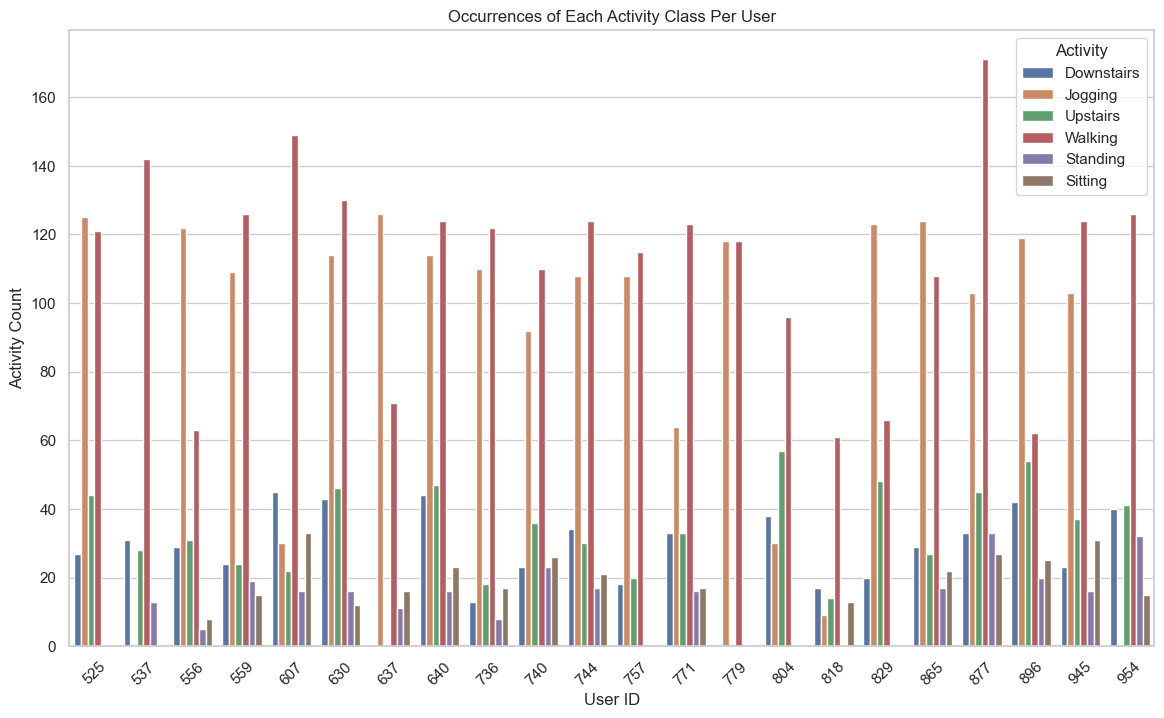

In [37]:
metadata[['userID', 'snippetID']] = metadata['user_snippet'].str.split('_', expand=True)
activity_counts_per_user = metadata.groupby(['userID', 'activity']).size().reset_index(name='activity_count')
plt.figure(figsize=(14, 8))
sns.barplot(data=activity_counts_per_user, x='userID', y='activity_count', hue='activity')
plt.title('Occurrences of Each Activity Class Per User')
plt.xlabel('User ID')
plt.ylabel('Activity Count')
plt.legend(title='Activity')
plt.xticks(rotation=45)
plt.show()

Activities distribution for the training dataset 'metadata.csv'

C:\Users\Admin\AppData\Local\Temp\ipykernel_19096\4183352993.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=overall_activity_distribution, x='activity', y='count', palette=palette, edgecolor=".2")
C:\Users\Admin\AppData\Local\Temp\ipykernel_19096\4183352993.py:14: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  barplot = sns.barplot(data=overall_activity_distribution, x='activity', y='count', palette=palette, edgecolor=".2")


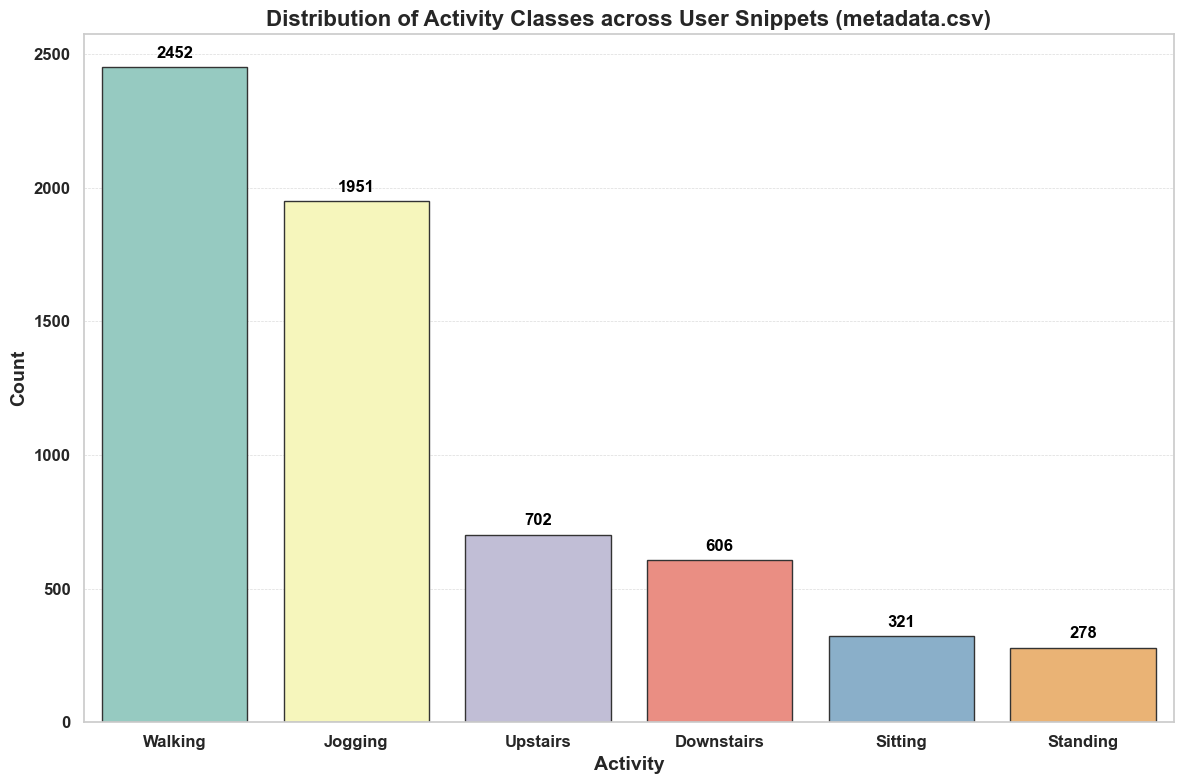

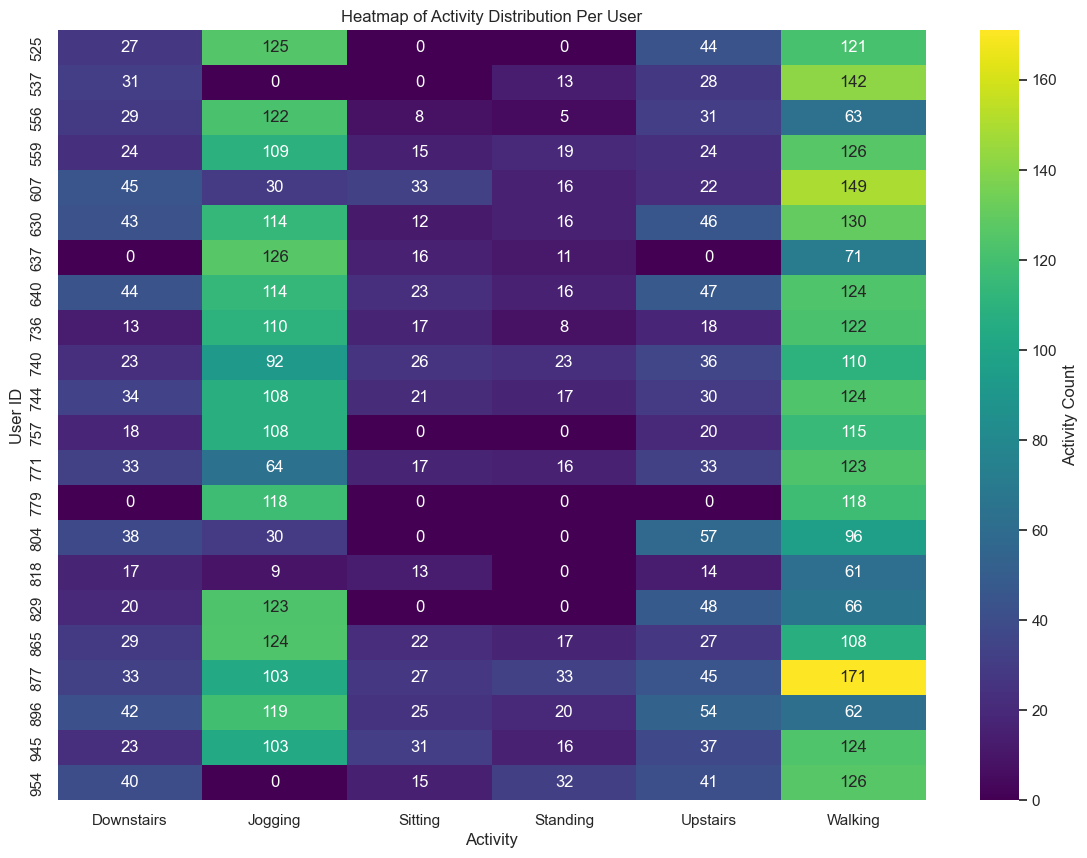

In [38]:
metadata[['userID', 'snippetID']] = metadata['user_snippet'].str.split('_', expand=True)
activity_counts_per_user = metadata.groupby(['userID', 'activity']).size().reset_index(name='activity_count')

overall_activity_distribution = metadata['activity'].value_counts().reset_index()
overall_activity_distribution.columns = ['activity', 'count']

sns.set(style="whitegrid")
palette = sns.color_palette("Set3")
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=overall_activity_distribution, x='activity', y='count', palette=palette, edgecolor=".2")
# Add y-axis values to each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points',
                     fontsize=12, color='black', weight='bold')

# Customization of the plot 
plt.title('Distribution of Activity Classes across User Snippets (metadata.csv)', fontsize=16, weight='bold')
plt.xlabel('Activity', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(True, linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

activity_distribution_per_user = metadata.groupby(['userID', 'activity']).size().unstack(fill_value=0)
# Plot the distribution of activities per user in a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(activity_distribution_per_user, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Activity Count'})
plt.title('Heatmap of Activity Distribution Per User')
plt.xlabel('Activity')
plt.ylabel('User ID')
plt.show()


Extracting the user_snippets grouped by distinct activity classes:

In [39]:
# Grouping the user_snippets by activity classes
user_snippets_by_activity = metadata.groupby('activity')['user_snippet'].apply(list).to_dict()
for activity, snippets in user_snippets_by_activity.items():
    print(f"Activity: {activity}")
    print(f"User Snippets: {snippets}")
    print("\n")

Activity: Downstairs
User Snippets: ['525_10', '525_36', '525_39', '525_75', '525_98', '525_112', '525_122', '525_138', '525_168', '525_169', '525_176', '525_179', '525_189', '525_212', '525_213', '525_220', '525_236', '525_252', '525_257', '525_259', '525_276', '525_277', '525_278', '525_281', '525_286', '525_292', '525_310', '537_10', '537_12', '537_23', '537_33', '537_37', '537_43', '537_53', '537_54', '537_56', '537_59', '537_64', '537_72', '537_77', '537_97', '537_98', '537_99', '537_100', '537_113', '537_120', '537_127', '537_131', '537_133', '537_143', '537_146', '537_159', '537_165', '537_185', '537_191', '537_206', '537_209', '537_211', '556_6', '556_11', '556_19', '556_21', '556_30', '556_38', '556_46', '556_48', '556_70', '556_76', '556_85', '556_87', '556_89', '556_94', '556_95', '556_143', '556_147', '556_148', '556_155', '556_158', '556_172', '556_179', '556_180', '556_185', '556_187', '556_201', '556_209', '556_225', '556_236', '559_3', '559_11', '559_20', '559_43', '559

Getting the correspoding signals rows categorized by the activity classes:

In [40]:
# Group the user_snippets by activity classes
user_snippets_by_activity = metadata.groupby('activity')['user_snippet'].apply(list).to_dict()

# Initialize a dictionary to store signal data for each activity
signals_by_activity = {activity: [] for activity in user_snippets_by_activity.keys()}
#Extraction
for activity, snippets in user_snippets_by_activity.items():
    activity_signals = signals[signals['user_snippet'].isin(snippets)]
    signals_by_activity[activity] = activity_signals

for activity, signals in signals_by_activity.items():
    print(f"Activity: {activity}")
    print(signals)
    print("\n")

for activity, signals in signals_by_activity.items():
    signals.to_csv(f'{activity}_signals.csv', index=False)

Activity: Downstairs
       user_snippet  x-axis  y-axis    z-axis  timestamp userID snippetID
1000         525_10   -0.42   11.54  0.572055        0.0    525        10
1001         525_10   -0.15    7.55  2.982856       50.0    525        10
1002         525_10   -1.31    9.23  2.724070      100.0    525        10
1003         525_10   -1.33    9.66  1.797886      150.0    525        10
1004         525_10   -1.12    7.82  0.612916      200.0    525        10
...             ...     ...     ...       ...        ...    ...       ...
629061      954_245    2.64   11.69 -4.020000     4750.0    954       245
629062      954_245    3.30    7.08 -6.020000     4800.0    954       245
629063      954_245    1.99    4.37 -6.660000     4850.0    954       245
629064      954_245    0.80    5.98 -8.200000     4900.0    954       245
629065      954_245   -0.69    6.82 -3.760000     4950.0    954       245

[60411 rows x 7 columns]


Activity: Jogging
       user_snippet  x-axis  y-axis    z-axis

Visualizing a sample from each activity class:

In [ ]:
metadata = pd.read_csv('metadata.csv')
unique_user_snippets_by_activity = metadata.groupby('activity')['user_snippet'].first().to_dict()
signals = pd.read_csv('signals.csv')

signals_by_activity = {activity: pd.DataFrame() for activity in unique_user_snippets_by_activity.keys()}

for activity, snippet in unique_user_snippets_by_activity.items():
    activity_signals = signals[signals['user_snippet'] == snippet]
    signals_by_activity[activity] = activity_signals


fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Time Series of Signals by Activity Class', fontsize=16)

axs = axs.flatten()

for i, (activity, signals) in enumerate(signals_by_activity.items()):
    if not signals.empty:
        ax = axs[i]
        ax.set_title(f'Activity: {activity}')
        
       
        ax.plot(signals['timestamp'].values, signals['x-axis'].values, label='x-axis', color='r')
        ax.plot(signals['timestamp'].values, signals['y-axis'].values, label='y-axis', color='g')
        ax.plot(signals['timestamp'].values, signals['z-axis'].values, label='z-axis', color='b')
        
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Signal')
        ax.legend(loc='upper right')

# adjust layout
for i in range(len(signals_by_activity), len(axs)):
    fig.delaxes(axs[i])
    
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Correlation inspection (signals data grouped by activity classes):

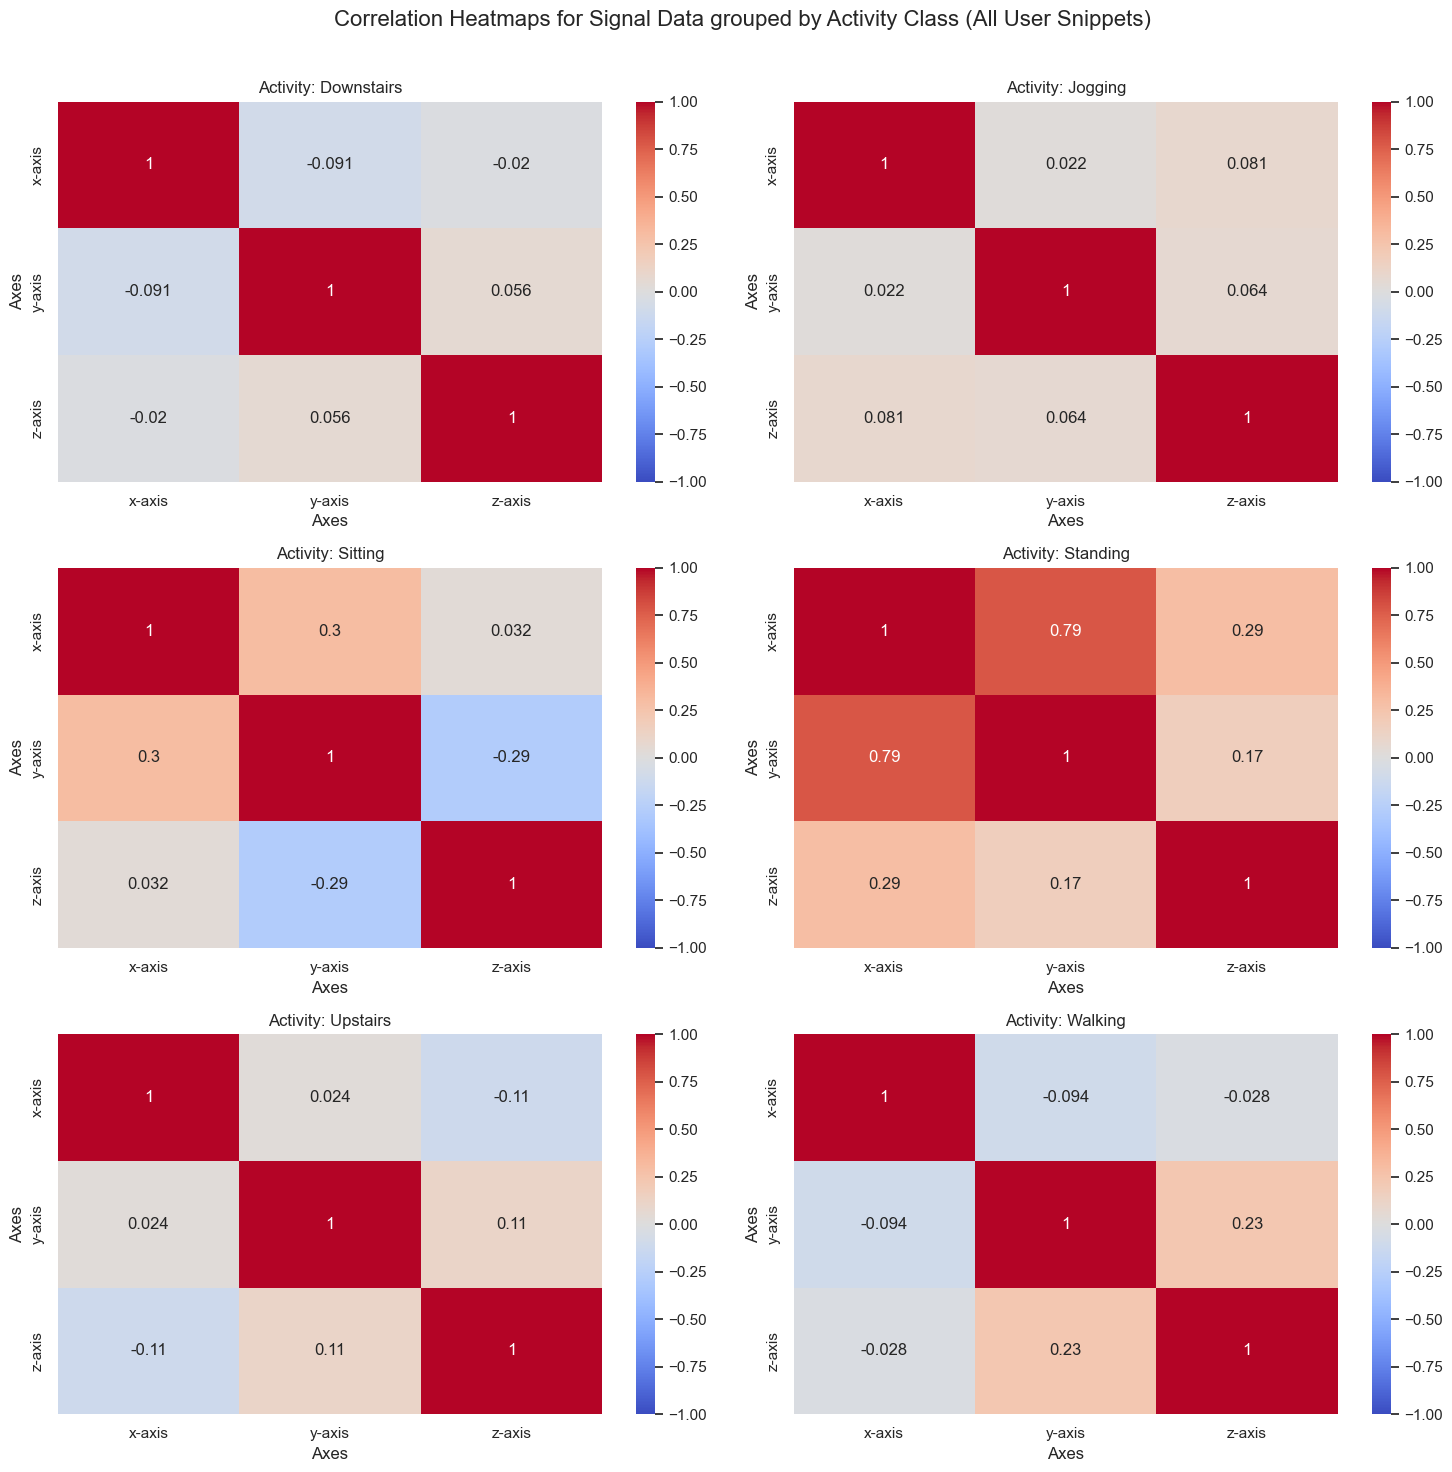

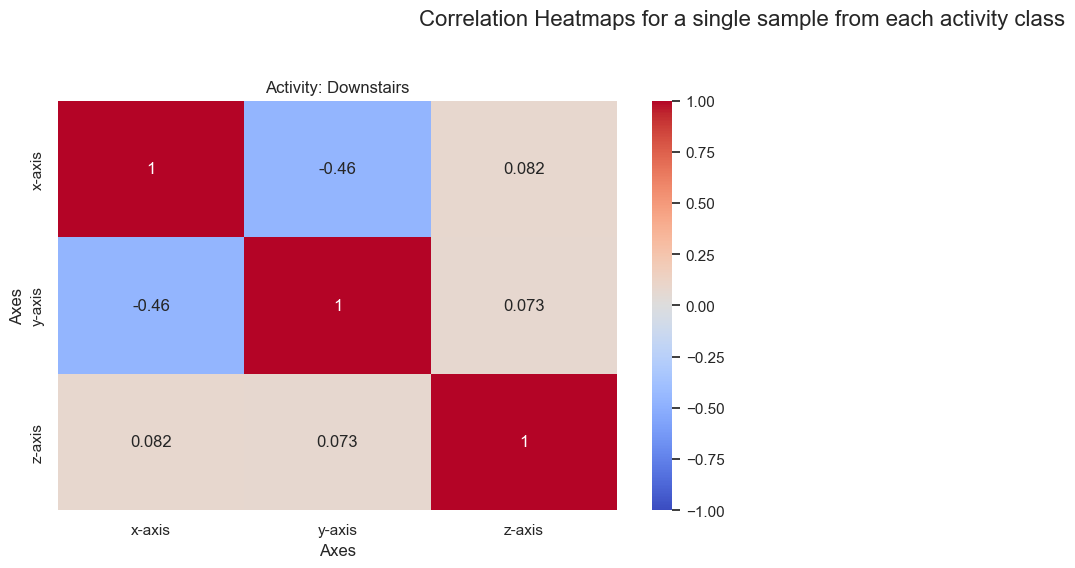

In [71]:
metadata_df = pd.read_csv('metadata.csv')
user_snippets_by_activity = metadata_df.groupby('activity')['user_snippet'].apply(list).to_dict()
signal_df = pd.read_csv('signals.csv')

aggregated_signals_by_activity = {activity: pd.DataFrame() for activity in user_snippets_by_activity.keys()}

for activity, snippets in user_snippets_by_activity.items():
    aggregated_signals = signal_df[signal_df['user_snippet'].isin(snippets)]
    aggregated_signals_by_activity[activity] = aggregated_signals

single_user_snippet_by_activity = metadata_df.groupby('activity')['user_snippet'].apply(lambda x: x.iloc[0]).to_dict()


signals_by_activity = {activity: pd.DataFrame() for activity in single_user_snippet_by_activity.keys()}


for activity, snippet in single_user_snippet_by_activity.items():
    signals = signal_df[signal_df['user_snippet'] == snippet]
    signals_by_activity[activity] = signals

plt.figure(figsize=(15, 15))
plt.suptitle('Correlation Heatmaps for Signal Data grouped by Activity Class (All User Snippets)', fontsize=16)

for i, (activity, signals) in enumerate(aggregated_signals_by_activity.items()):
    if not signals.empty:
        plt.subplot(3, 2, i+1)
        plt.title(f'Activity: {activity}')
        correlation_matrix = signals[['x-axis', 'y-axis', 'z-axis']].corr()
        
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.xlabel('Axes')
        plt.ylabel('Axes')
        plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['x-axis', 'y-axis', 'z-axis'])
        plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['x-axis', 'y-axis', 'z-axis'])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

plt.figure(figsize=(15, 15))
plt.suptitle('Correlation Heatmaps for a single sample from each activity class', fontsize=16)

for i, (activity, signals) in enumerate(signals_by_activity.items()):
    if not signals.empty:
        plt.subplot(3, 2, i+1)
        plt.title(f'Activity: {activity}')
        
        correlation_matrix = signals[['x-axis', 'y-axis', 'z-axis']].corr()
        
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.xlabel('Axes')
        plt.ylabel('Axes')
        plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['x-axis', 'y-axis', 'z-axis'])
        plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['x-axis', 'y-axis', 'z-axis'])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


box plot for the user_snippets categorized by activity classes (Signals):

In [ ]:
metadata = pd.read_csv('metadata.csv')
signals = pd.read_csv('signals.csv')

user_snippets_by_activity = metadata.groupby('activity')['user_snippet'].apply(list).to_dict()

aggregated_signals_by_activity = {activity: pd.DataFrame() for activity in user_snippets_by_activity.keys()}

# Aggregate signal data for each activity class
for activity, snippets in user_snippets_by_activity.items():
    aggregated_signals = signals[signals['user_snippet'].isin(snippets)]
    
    aggregated_signals_by_activity[activity] = aggregated_signals


fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Box Plots for Signal Data by Activity Class', fontsize=16)
axs = axs.flatten()

for i, (activity, signals) in enumerate(aggregated_signals_by_activity.items()):
    if not signals.empty:
        ax = axs[i]
        ax.set_title(f'Activity: {activity}')
        
       
        sns.boxplot(data=signals[['x-axis', 'y-axis', 'z-axis']], ax=ax, orient='v', palette='Set2')
        
        ax.set_xlabel('Axes')
        ax.set_ylabel('Signal')
        ax.set_xticks([0, 1, 2])
        ax.set_xticklabels(['x-axis', 'y-axis', 'z-axis'])

for i in range(len(aggregated_signals_by_activity), len(axs)):
    fig.delaxes(axs[i])
    
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Descriptive statistics for groups 

In [ ]:
metadata = pd.read_csv('metadata.csv')
signal_df = pd.read_csv('signals.csv')
user_snippets_by_activity = metadata.groupby('activity')['user_snippet'].apply(list).to_dict()
merged_data = pd.merge(metadata, signal_df, on='user_snippet')
grouped_data = merged_data.groupby('activity')

activity_statistics = {}
for activity, snippets in user_snippets_by_activity.items():
   
    activity_data = merged_data[merged_data['user_snippet'].isin(snippets)]
    
    statistics = activity_data[['x-axis', 'y-axis', 'z-axis']].describe()
    
  
    activity_statistics[activity] = statistics

for activity, statistics in activity_statistics.items():
    print(f'Descriptive Statistics for Activity: {activity}')
    print(statistics)
    print('\n')

**Inspecting the Important Features**

In [ ]:
metadata_df = pd.read_csv('metadata.csv')
metadata_df[['userID', 'snippetID']] = metadata_df['user_snippet'].str.split('_', expand=True)
label_encoder = LabelEncoder()
metadata_df['activity_encoded'] = label_encoder.fit_transform(metadata_df['activity'])

X = metadata_df.drop(columns=['user_snippet', 'userID', 'snippetID', 'activity', 'activity_encoded'])
y = metadata_df['activity_encoded']

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# customizing the visual
for index, value in enumerate(importance_df['Importance']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10)

plt.show()

# Extract important features
important_features = importance_df[importance_df['Importance'] > 0].Feature.tolist()
important_X = X[important_features]

plt.figure(figsize=(20, 16))
correlation_matrix = important_X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8}, cbar_kws={"shrink": .8})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix of Important Features', fontsize=16)
plt.show()

Signals file:
Data Distribution "Kernel Densuity Estimate plot"

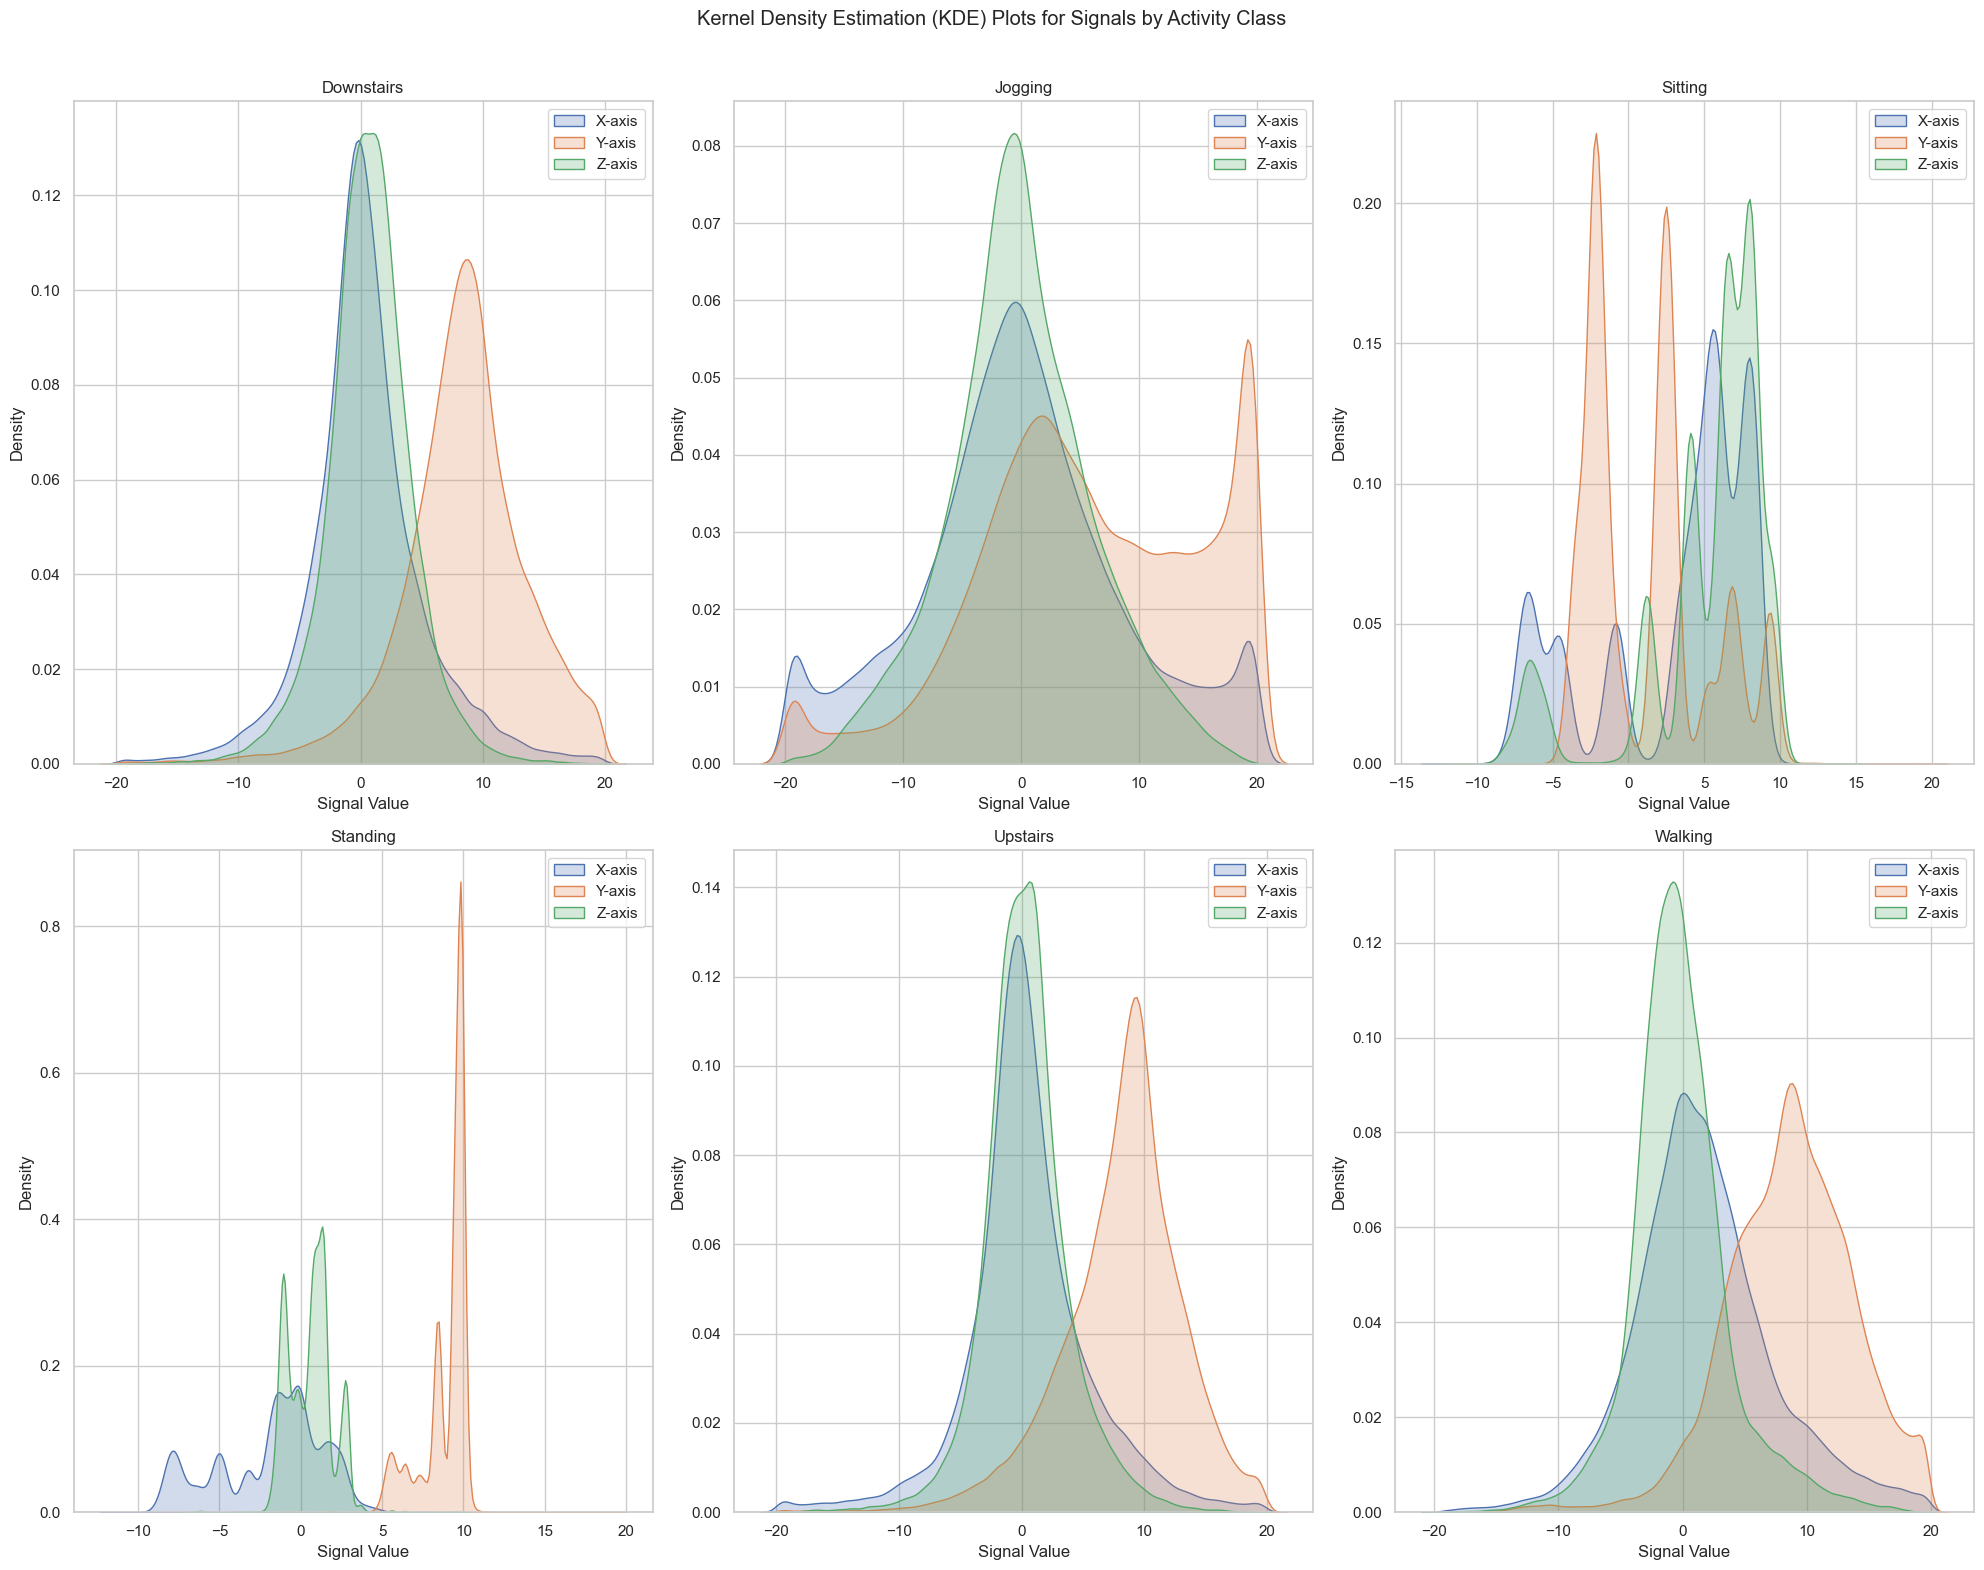

In [64]:
warnings.filterwarnings('ignore')
metadata = pd.read_csv('metadata.csv')
signals = pd.read_csv('signals.csv')
user_snippets_by_activity = metadata.groupby('activity')['user_snippet'].apply(list).to_dict()
aggregated_signals_by_activity = {activity: pd.DataFrame() for activity in user_snippets_by_activity.keys()}

for activity, snippets in user_snippets_by_activity.items():
    aggregated_signals = signals[signals['user_snippet'].isin(snippets)]
    aggregated_signals_by_activity[activity] = aggregated_signals

# number of rows and columns for the subplots
num_rows = (len(aggregated_signals_by_activity) + 2) // 3
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 8*num_rows))
fig.suptitle('Kernel Density Estimation (KDE) Plots for Signals by Activity Class')

for i, (activity, signals) in enumerate(aggregated_signals_by_activity.items()):
    if not signals.empty:
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        ax.set_title(f'{activity}')
        sns.kdeplot(data=signals['x-axis'], label='X-axis', shade=True, ax=ax)
        sns.kdeplot(data=signals['y-axis'], label='Y-axis', shade=True, ax=ax)
        sns.kdeplot(data=signals['z-axis'], label='Z-axis', shade=True, ax=ax)
        ax.set_xlabel('Signal Value')
        ax.set_ylabel('Density')
        ax.legend()

for i in range(len(aggregated_signals_by_activity), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Metadata set:
Correlation inspection between features

In [ ]:
metadata = pd.read_csv('metadata.csv')
metadata_excluded = metadata.drop(columns=['user_snippet', 'activity'])
corr_matrix = metadata_excluded.corr()

plt.figure(figsize=(22, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8}, cbar_kws={"shrink": .8})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Extract significant correlations (greater than 0.5 or less than -0.5)
threshold = 0.5
significant_corr = corr_matrix[(corr_matrix > threshold) | (corr_matrix < -threshold)]
np.fill_diagonal(significant_corr.values, np.nan)

significant_corr = significant_corr.dropna(axis=0, how='all').dropna(axis=1, how='all')

significant_corr_melted = significant_corr.reset_index().melt(id_vars='index').dropna()
significant_corr_melted.columns = ['Variable 1', 'Variable 2', 'Correlation Coefficient']

significant_corr_melted['abs_corr'] = significant_corr_melted['Correlation Coefficient'].abs()
significant_corr_melted = significant_corr_melted.sort_values('abs_corr', ascending=False).drop_duplicates(subset=['abs_corr']).drop(columns=['abs_corr'])

significant_corr_melted.reset_index(drop=True, inplace=True)
print(significant_corr_melted)


2. **Additional Features Extraction**

2.1 **Phase one of features extraction**: 
Extraction of Skewness, kurtosis, iqr, percentile_10, percentile_90, num_peaks.NOTE: repeat the same code for the two remaining files just by changing the input files names (signals & metadata) and the name of the saved on at the end.

In [ ]:
signals_df = pd.read_csv('signals.csv')
signals_df[['userID', 'snippetID']] = signals_df['user_snippet'].str.split('_', expand=True)

# function to calculate the additional features for each axis
def extract_features(signal):
    features = {}
    features['skewness'] = skew(signal)
    features['kurtosis'] = kurtosis(signal)
    features['iqr'] = np.percentile(signal, 75) - np.percentile(signal, 25)
    features['percentile_10'] = np.percentile(signal, 10)
    features['percentile_90'] = np.percentile(signal, 90)
    features['num_peaks'] = len(find_peaks(signal)[0])
    return features

features_list = []

# Group by 'user_snippet' and extract features for each group
for user_snippet, group in signals_df.groupby('user_snippet'):
    feature_dict = {'user_snippet': user_snippet}
    for axis in ['x-axis', 'y-axis', 'z-axis']:
        axis_features = extract_features(group[axis])
        for feature_name, value in axis_features.items():
            feature_dict[f'{axis}_{feature_name}'] = value
    features_list.append(feature_dict)

extracted_features_df = pd.DataFrame(features_list)
metadata_df = pd.read_csv('metadata.csv')
# Merge and save the extracted features with the corresponding metadata
merged_df = pd.merge(metadata_df, extracted_features_df, on='user_snippet', how='left')
merged_df.to_csv('metadata_additional_features.csv', index=False)

2.2 **Second phase of features extraction** 
 [Just change the files names to extract from the three concerned signals files]
The features extracted are:
Root Mean Square (RMS)
Energy
Dominant Frequency
Spectral Entropy
Correlation between axes (xy, xz, yz)
Signal Magnitude Area (SMA)
Autocorrelation

In [ ]:
signals_df = pd.read_csv('signals_test.csv')
signals_df[['userID', 'snippetID']] = signals_df['user_snippet'].str.split('_', expand=True)

def extract_features(signal):
    features = {}
    features['rms'] = np.sqrt(np.mean(signal**2))
    features['energy'] = np.sum(signal**2)    
    # Frequency domain features
    freqs, psd = periodogram(signal)
    features['dominant_frequency'] = freqs[np.argmax(psd)]
    features['spectral_entropy'] = entropy(psd)
    
    return features

features_list = []

for user_snippet, group in signals_df.groupby('user_snippet'):
    feature_dict = {'user_snippet': user_snippet}
    for axis in ['x-axis', 'y-axis', 'z-axis']:
        axis_features = extract_features(group[axis])
        for feature_name, value in axis_features.items():
            feature_dict[f'{axis}_{feature_name}'] = value
    
    # Calculate correlation between axes
    feature_dict['xy_correlation'] = np.corrcoef(group['x-axis'], group['y-axis'])[0, 1]
    feature_dict['xz_correlation'] = np.corrcoef(group['x-axis'], group['z-axis'])[0, 1]
    feature_dict['yz_correlation'] = np.corrcoef(group['y-axis'], group['z-axis'])[0, 1]
    
    # Signal Magnitude Area 
    feature_dict['sma'] = np.sum(np.abs(group[['x-axis', 'y-axis', 'z-axis']]).values)
    
    # Autocorrelation
    feature_dict['x_autocorr'] = np.correlate(group['x-axis'], group['x-axis'], mode='full')[len(group['x-axis'])-1]
    feature_dict['y_autocorr'] = np.correlate(group['y-axis'], group['y-axis'], mode='full')[len(group['y-axis'])-1]
    feature_dict['z_autocorr'] = np.correlate(group['z-axis'], group['z-axis'], mode='full')[len(group['z-axis'])-1]
    
    features_list.append(feature_dict)

extracted_features_df = pd.DataFrame(features_list)
metadata_df = pd.read_csv('metadata_test.csv')
merged_df = pd.merge(metadata_df, extracted_features_df, on='user_snippet', how='left')
merged_df.to_csv('metadata_test_Second_featuresExtraction.csv', index=False)


2.3 **Third and final phase of features extraction**
Correlation Between Axes:
xy_correlation: Correlation coefficient between the x-axis and y-axis.
xz_correlation: Correlation coefficient between the x-axis and z-axis.
yz_correlation: Correlation coefficient between the y-axis and z-axis.

Cross-Correlation Features:
xy_cross_corr_max: Maximum value of the cross-correlation between the x-axis and y-axis.
xz_cross_corr_max: Maximum value of the cross-correlation between the x-axis and z-axis.
yz_cross_corr_max: Maximum value of the cross-correlation between the y-axis and z-axis.
xy_cross_corr_mean: Mean value of the cross-correlation between the x-axis and y-axis.
xz_cross_corr_mean: Mean value of the cross-correlation between the x-axis and z-axis.
yz_cross_corr_mean: Mean value of the cross-correlation between the y-axis and z-axis.
xy_cross_corr_std: Standard deviation of the cross-correlation between the x-axis and y-axis.
xz_cross_corr_std: Standard deviation of the cross-correlation between the x-axis and z-axis.
yz_cross_corr_std: Standard deviation of the cross-correlation between the y-axis and z-axis.

In [ ]:
signals_df = pd.read_csv('signals.csv')
signals_df[['userID', 'snippetID']] = signals_df['user_snippet'].str.split('_', expand=True)

def extract_cross_axis_features(group):
    features = {}
    
    # Correlation between axes
    features['xy_correlation'] = np.corrcoef(group['x-axis'], group['y-axis'])[0, 1]
    features['xz_correlation'] = np.corrcoef(group['x-axis'], group['z-axis'])[0, 1]
    features['yz_correlation'] = np.corrcoef(group['y-axis'], group['z-axis'])[0, 1]
    
    # Cross-correlation features
    xy_cross_corr = correlate(group['x-axis'], group['y-axis'])
    xz_cross_corr = correlate(group['x-axis'], group['z-axis'])
    yz_cross_corr = correlate(group['y-axis'], group['z-axis'])
    
    features['xy_cross_corr_max'] = np.max(xy_cross_corr)
    features['xz_cross_corr_max'] = np.max(xz_cross_corr)
    features['yz_cross_corr_max'] = np.max(yz_cross_corr)
    
    features['xy_cross_corr_mean'] = np.mean(xy_cross_corr)
    features['xz_cross_corr_mean'] = np.mean(xz_cross_corr)
    features['yz_cross_corr_mean'] = np.mean(yz_cross_corr)
    
    features['xy_cross_corr_std'] = np.std(xy_cross_corr)
    features['xz_cross_corr_std'] = np.std(xz_cross_corr)
    features['yz_cross_corr_std'] = np.std(yz_cross_corr)
    
    return features

features_list = []
for user_snippet, group in signals_df.groupby('user_snippet'):
    feature_dict = {'user_snippet': user_snippet}
    cross_axis_features = extract_cross_axis_features(group)
    feature_dict.update(cross_axis_features)
    features_list.append(feature_dict)

extracted_features_df = pd.DataFrame(features_list)

metadata_df = pd.read_csv('metadata_Second_featuresExtraction.csv')
merged_df = pd.merge(metadata_df, extracted_features_df, on='user_snippet', how='left')
merged_df.to_csv('metadata_cross_axis_features.csv', index=False)

**Machine Learning Modeling**

1. **Random Forest model**

-1.1 Fed with the pre-extracted features in addition to the ones extracted during the first phase of extraction (skewness, kurtosis, iqt, percentiles, and number of peaks)
-Identification of the optimal hyperparameters.

In [ ]:
metadata_df = pd.read_csv('metadata_with_signal_features.csv')
metadata_test_df = pd.read_csv('metadata_test_additional_features.csv')
metadata_kaggle_df = pd.read_csv('metadata_kaggle_additional_features.csv')

metadata_df[['userID', 'snippetID']] = metadata_df['user_snippet'].str.split('_', expand=True)
metadata_test_df[['userID', 'snippetID']] = metadata_test_df['user_snippet'].str.split('_', expand=True)
metadata_kaggle_df[['userID', 'snippetID']] = metadata_kaggle_df['user_snippet'].str.split('_', expand=True)

# Encoding the target variable 'activity' 
label_encoder = LabelEncoder()
metadata_df['activity_encoded'] = label_encoder.fit_transform(metadata_df['activity'])

X = metadata_df.drop(columns=['user_snippet', 'userID', 'snippetID', 'activity', 'activity_encoded'])
y = metadata_df['activity_encoded']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#hyperparameters to evaluate
n_estimators_range = range(50, 201, 50)
max_depth_range = range(1, 21)
min_samples_split_range = range(2, 11)
min_samples_leaf_range = range(1, 11)
accuracy_results = {
    'n_estimators': [],
    'max_depth': [],
    'min_samples_split': [],
    'min_samples_leaf': []
}
best_params = {}
best_accuracy = 0

# Function to evaluate the model with the different hyperparameters
def evaluate_model(param_name, param_range):
    global best_accuracy
    best_param_value = None
    accuracies = []

    for param_value in param_range:
        params = {
            'n_estimators': 100,
            'max_depth': None,
            'min_samples_split': 2,
            'min_samples_leaf': 1,
            param_name: param_value
        }
        clf = RandomForestClassifier(**params, random_state=42)
        clf.fit(X_train, y_train)
        val_predictions = clf.predict(X_val)
        accuracy = accuracy_score(y_val, val_predictions)
        accuracies.append(accuracy)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_param_value = param_value

    accuracy_results[param_name] = accuracies
    return best_param_value

# Evaluate and find the best hyperparameters
best_params['n_estimators'] = evaluate_model('n_estimators', n_estimators_range)
best_params['max_depth'] = evaluate_model('max_depth', max_depth_range)
best_params['min_samples_split'] = evaluate_model('min_samples_split', min_samples_split_range)
best_params['min_samples_leaf'] = evaluate_model('min_samples_leaf', min_samples_leaf_range)

# Plot of accuracy vs hyperparameters
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.plot(n_estimators_range, accuracy_results['n_estimators'], marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(max_depth_range, accuracy_results['max_depth'], marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(min_samples_split_range, accuracy_results['min_samples_split'], marker='o')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Min Samples Split')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(min_samples_leaf_range, accuracy_results['min_samples_leaf'], marker='o')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Min Samples Leaf')
plt.grid(True)

plt.tight_layout()
plt.show()

print('Best Hyperparameters Found:')
for param, value in best_params.items():
    print(f'{param}: {value}')


Tuning the model with the hyperparameters found in the previous process, with a consideration of the important features.
**Results**:
>>> Test Set Accuracy: 0.83
>>> Accuracy score on kaggle set : 0.8249

In [ ]:
metadata_df = pd.read_csv('metadata_with_signal_features.csv')
metadata_test_df = pd.read_csv('metadata_test_additional_features.csv')
metadata_kaggle_df = pd.read_csv('metadata_kaggle_additional_features.csv')

metadata_df[['userID', 'snippetID']] = metadata_df['user_snippet'].str.split('_', expand=True)
metadata_test_df[['userID', 'snippetID']] = metadata_test_df['user_snippet'].str.split('_', expand=True)
metadata_kaggle_df[['userID', 'snippetID']] = metadata_kaggle_df['user_snippet'].str.split('_', expand=True)

label_encoder = LabelEncoder()
metadata_df['activity_encoded'] = label_encoder.fit_transform(metadata_df['activity'])

X = metadata_df.drop(columns=['user_snippet', 'userID', 'snippetID', 'activity', 'activity_encoded'])
y = metadata_df['activity_encoded']
#Train
clf = RandomForestClassifier(n_estimators=200, max_depth=15)
clf.fit(X, y)
# Get feature importances
feature_importances = clf.feature_importances_
features = X.columns
#visualizing the important features
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

important_features = importance_df[importance_df['Importance'] > 0].Feature.tolist()

# Preparation of the training, test, and validation sets including the important features
X_train = metadata_df[important_features]
X_test = metadata_test_df[important_features]
X_kaggle = metadata_kaggle_df[important_features]

# Fit the model again with the important features
clf.fit(X_train, y)
test_predictions = clf.predict(X_test)
kaggle_predictions = clf.predict(X_kaggle)

test_predictions_decoded = label_encoder.inverse_transform(test_predictions)
kaggle_predictions_decoded = label_encoder.inverse_transform(kaggle_predictions)

test_accuracy = accuracy_score(metadata_test_df['activity'], test_predictions_decoded)
print(f'Test Set Accuracy: {test_accuracy:.2f}')

metadata_test_df['activity'] = test_predictions_decoded
metadata_kaggle_df['activity'] = kaggle_predictions_decoded
metadata_kaggle_df[['user_snippet', 'activity']].to_csv('Tarek_predictions.csv', index=False)

1.2 Model fed with the additional features extracted during the **second phase** of extraction, including : RMS, ZCR, energy, entropy, dominant frequency, Spectral Entropy, Correlation between axes (xy, xz, yz), SMA, Autocorrelation,
SNR
-With the consideration of the important features
**RESULTS**:
>>> Accuracy score on the test set predictions = 0.87
>>> Accuracy score on the kaggle dataset predictions = 0.867

In [ ]:

metadata_df = pd.read_csv('metadata_Second_featuresExtraction.csv')
metadata_test_df = pd.read_csv('metadata_test_Second_featuresExtraction.csv')
metadata_kaggle_df = pd.read_csv('metadata_kaggle_Second_featuresExtraction.csv')

metadata_df[['userID', 'snippetID']] = metadata_df['user_snippet'].str.split('_', expand=True)
metadata_test_df[['userID', 'snippetID']] = metadata_test_df['user_snippet'].str.split('_', expand=True)
metadata_kaggle_df[['userID', 'snippetID']] = metadata_kaggle_df['user_snippet'].str.split('_', expand=True)

label_encoder = LabelEncoder()
metadata_df['activity_encoded'] = label_encoder.fit_transform(metadata_df['activity'])
X = metadata_df.drop(columns=['user_snippet', 'userID', 'snippetID', 'activity', 'activity_encoded'])
y = metadata_df['activity_encoded']

clf = RandomForestClassifier(n_estimators=200, max_depth=15)
clf.fit(X, y)

# consideration of feature importances
feature_importances = clf.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
important_features = importance_df[importance_df['Importance'] > 0].Feature.tolist()

X_train = metadata_df[important_features]
X_test = metadata_test_df[important_features]
X_kaggle = metadata_kaggle_df[important_features]

clf.fit(X_train, y)
#predict
test_predictions = clf.predict(X_test)
kaggle_predictions = clf.predict(X_kaggle)

test_predictions_decoded = label_encoder.inverse_transform(test_predictions)
kaggle_predictions_decoded = label_encoder.inverse_transform(kaggle_predictions)

test_accuracy = accuracy_score(metadata_test_df['activity'], test_predictions_decoded)
print(f'Test Set Accuracy: {test_accuracy:.2f}')

metadata_test_df['activity'] = test_predictions_decoded
metadata_kaggle_df['activity'] = kaggle_predictions_decoded
metadata_kaggle_df[['user_snippet', 'activity']].to_csv('RF_With_BEST_Param.csv', index=False)

1.3 The same previous RF Model fed with the features extracted during the third phase of extraction including : the correlation between axes, and the cross-correlation features.
**RESULTS**
>>>accuracy on the test set = 0.86
>>>accuracy on kaggle = 0.876

2. **Ensemble Method with Voting Classifier**

2.1 Fed with the pre-extracted features in addition to the ones extracted during the first phase of extraction (skewness, kurtosis, iqt, percentiles, and number of peaks)
**Results**
>>>Accuracy predictions on the test set: 0.85
>>>Accuracy predictions on the kaggle set: 0.86

In [ ]:
metadata_df = pd.read_csv('metadata_with_signal_features.csv')
metadata_test_df = pd.read_csv('metadata_test_additional_features.csv')
metadata_kaggle_df = pd.read_csv('metadata_kaggle_additional_features.csv')

label_encoder = LabelEncoder()
metadata_df['activity_encoded'] = label_encoder.fit_transform(metadata_df['activity'])
X = metadata_df.drop(columns=['user_snippet', 'activity', 'activity_encoded'])
y = metadata_df['activity_encoded']

X_test = metadata_test_df[X.columns]
X_kaggle = metadata_kaggle_df[X.columns]

# Initialization of the base models
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)

#  Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_clf),
    ('gb', gb_clf),
    ('svm', svm_clf)
], voting='soft')

voting_clf.fit(X, y)
test_predictions = voting_clf.predict(X_test)
kaggle_predictions = voting_clf.predict(X_kaggle)
test_predictions_decoded = label_encoder.inverse_transform(test_predictions)
kaggle_predictions_decoded = label_encoder.inverse_transform(kaggle_predictions)

test_accuracy = accuracy_score(metadata_test_df['activity'], test_predictions_decoded)
print(f'Test Set Accuracy with Voting Classifier: {test_accuracy:.2f}')

metadata_test_df['predicted_activity'] = test_predictions_decoded
metadata_kaggle_df['predicted_activity'] = kaggle_predictions_decoded
metadata_kaggle_df[['user_snippet', 'predicted_activity']].to_csv('Tarek_predictions.csv', index=False)

Ensemble model fed by the Second features extraction metadata:
**RESULTS**: 
>>>Test Set Accuracy with Voting Classifier: 0.86
>>> Accuracy on kaggle = 88%

In [ ]:
metadata_df = pd.read_csv('metadata_with_signal_features.csv')
metadata_test_df = pd.read_csv('metadata_test_additional_features.csv')
metadata_kaggle_df = pd.read_csv('metadata_kaggle_additional_features.csv')
label_encoder = LabelEncoder()
metadata_df['activity_encoded'] = label_encoder.fit_transform(metadata_df['activity'])

X = metadata_df.drop(columns=['user_snippet', 'activity', 'activity_encoded'])
y = metadata_df['activity_encoded']

X_test = metadata_test_df[X.columns]
X_kaggle = metadata_kaggle_df[X.columns]

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_clf),
    ('gb', gb_clf),
    ('svm', svm_clf)
], voting='soft')

voting_clf.fit(X, y)
test_predictions = voting_clf.predict(X_test)
kaggle_predictions = voting_clf.predict(X_kaggle)
test_predictions_decoded = label_encoder.inverse_transform(test_predictions)
kaggle_predictions_decoded = label_encoder.inverse_transform(kaggle_predictions)
test_accuracy = accuracy_score(metadata_test_df['activity'], test_predictions_decoded)
print(f'Test Set Accuracy with Voting Classifier: {test_accuracy:.2f}')
metadata_test_df['predicted_activity'] = test_predictions_decoded
metadata_kaggle_df['predicted_activity'] = kaggle_predictions_decoded
metadata_kaggle_df[['user_snippet', 'prediction']].to_csv('Tarek_Second_predictions.csv', index=False)

2.3 The same previous Model fed with the features extracted during the third phase of extraction including : the correlation between axes, and the cross-correlation features.
**RESULTS**
>>>accuracy on the test set = 0.86
>>>accuracy on kaggle = 0.88191

3. **Convolutional Neural Network Model**

Model fed directly with all the features extracted during the three phases:
I have used the random search to search the best parameters among the defined ones. 
Tracking the learning evolution of the model is included, Accuracy and loss are plotted over epochs to visualize the training process.
A confusion matrix as well.
-The best parameters detected are : {'model__neurons_2': 64, 'model__neurons_1': 256, 'model__learning_rate': 0.0001, 'epochs': 30, 'batch_size': 64}
**RESULTS**
>>> Accuracy score on test set: 0.84
>>> Accuracy score on kaggle : 0.87035

In [ ]:
metadata_df = pd.read_csv('metadata_cross_axis_features.csv')
metadata_test_df = pd.read_csv('metadata_test_cross_axis_features.csv')
metadata_kaggle_df = pd.read_csv('metadata_kaggle_cross_axis_features.csv')

label_encoder = LabelEncoder()
metadata_df['activity_encoded'] = label_encoder.fit_transform(metadata_df['activity'])

X = metadata_df.drop(columns=['user_snippet', 'activity', 'activity_encoded'])
y = metadata_df['activity_encoded']

columns = X.columns

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(metadata_test_df[columns])
X_kaggle = scaler.transform(metadata_kaggle_df[columns])

# Convert target to one-hot encoding
y = to_categorical(y)

# Define a function to create the neural network model
def create_model(neurons_1=128, neurons_2=64, learning_rate=0.001):
    model = Sequential([
        Dense(neurons_1, activation='relu', input_shape=(X.shape[1],)),
        Dense(neurons_2, activation='relu'),
        Dense(y.shape[1], activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model with KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

# Define the hyperparameter to search randomly
param_dist = {
    'model__neurons_1': [64, 128, 256],
    'model__neurons_2': [32, 64, 128],
    'model__learning_rate': [0.01, 0.001, 0.0001],
    'batch_size': [16, 32, 64],
    'epochs': [30, 50, 100]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, n_jobs=-1, cv=3)
random_result = random_search.fit(X, y)

print(f'Best Hyperparameters: {random_result.best_params_}')

# Train the model with the best hyperparameters
best_params = random_result.best_params_

best_neurons_1 = best_params['model__neurons_1']
best_neurons_2 = best_params['model__neurons_2']
best_learning_rate = best_params['model__learning_rate']
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

best_model = create_model(neurons_1=best_neurons_1, neurons_2=best_neurons_2, learning_rate=best_learning_rate)

# Train the model and capture the training history
history = best_model.fit(X, y, batch_size=best_batch_size, epochs=best_epochs, validation_split=0.2, verbose=1)

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions on the test and validation datasets
test_predictions = best_model.predict(X_test)
kaggle_predictions = best_model.predict(X_kaggle)

# Convert one-hot encoded predictions to single labels
test_predictions_labels = np.argmax(test_predictions, axis=1)
kaggle_predictions_labels = np.argmax(kaggle_predictions, axis=1)

# Decode the predicted activities back to original labels
test_predictions_decoded = label_encoder.inverse_transform(test_predictions_labels)
kaggle_predictions_decoded = label_encoder.inverse_transform(kaggle_predictions_labels)

test_accuracy = accuracy_score(metadata_test_df['activity'], test_predictions_decoded)
print(f'Test Set Accuracy with Tuned Neural Network: {test_accuracy:.2f}')

cm = confusion_matrix(metadata_test_df['activity'], test_predictions_decoded)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
cmd.plot()
plt.title('Confusion Matrix')
plt.show()

metadata_test_df['prediction'] = test_predictions_decoded
metadata_kaggle_df['prediction'] = kaggle_predictions_decoded
metadata_kaggle_df[['user_snippet', 'prediction']].to_csv('Tarek_crossaxis_predictions.csv', index=False)


4. **XGBoost Model**

Best performant model in terms of accuracy score: 
**RESULTS**
>>> accuracy score on predicting the metadata_kaggle set: 90.586%

In [ ]:
metadata_df = pd.read_csv('metadata_cross_axis_features.csv')
metadata_kaggle_df = pd.read_csv('metadata_kaggle_cross_axis_features.csv')

label_encoder = LabelEncoder()
metadata_df['activity_encoded'] = label_encoder.fit_transform(metadata_df['activity'])
X = metadata_df.drop(columns=['user_snippet', 'activity', 'activity_encoded'])
y = metadata_df['activity_encoded']

columns = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_kaggle = scaler.transform(metadata_kaggle_df[columns])
model = xgb.XGBClassifier(
    use_label_encoder=False,
    learning_rate=0.1,
    n_estimators=2500,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1
)

model.fit(X, y)
kaggle_predictions = model.predict(X_kaggle)
kaggle_predictions_decoded = label_encoder.inverse_transform(kaggle_predictions)

metadata_kaggle_df['prediction'] = kaggle_predictions_decoded
metadata_kaggle_df[['user_snippet', 'prediction']].to_csv('Tarek_predictions.csv', index=False)